# Stanford Open Policing Project - Rhode Island analysis

## Read into a pandas dataframe the police.csv file located here:
https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv

In [333]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [2]:
# Read in the csv file
ri = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')


In [3]:
# Look at the head
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


### Examining the data
Each row represents one traffic stop

We first notice that 'county_name' and 'search_type' have lots of NaN values
To get a better idea of where the NaN values are in the dataset we can use the .isnull() method chained with .sum() to find the count of NaN values in each column and compare that to the .shape of the dataframe

In [4]:
ri.shape

(91741, 15)

In [5]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

From this we see that there are 91741 rows in the dataset
Also we note that the 'county_name' column has that many missing values - so it can be safely dropped
Since we are only interested in the state of Rhode Island, the 'state' column is of no use so we can drop it as well

In [6]:
ri.drop(['county_name','state'], axis='columns', inplace=True)

The 'driver_gender' will be critical to our analysis because we are interested in the impact of gender on traffic stops. Since we have 5205 missing values out of 91741 (5.7%) we can drop any specific rows that have this column as a missing value

In [7]:
ri.dropna(subset=['driver_gender'], inplace=True)
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

# Cleaning the dataset data types

In [8]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [9]:
# Let's look at the dtype of each column
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In looking at the values from the .head() method we see that there are many columns in this dataset that appear to have the wrong data type. We can change them by using the .astype() method.

In [10]:
# The values of 'is_arrested' are True/False so we need to recast this column's datatype
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [11]:
ri.is_arrested.dtype

dtype('bool')

The next obvious column that needs to be addressed is the stop_date and stop_time columns.
We want to combine these two columns into a single datetime column, recast as a 'datetime' dtype and then set it as the index of the dataframe

In [12]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['date_and_time'] = pd.to_datetime(combined)
ri.set_index('date_and_time', inplace=True)

In [13]:
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='date_and_time', length=86536, freq=None)

In [14]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [15]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# Explore the relationship between gender and policing

Before comparing the violations being committed by each gender, we will examine the violations committed by all drivers to get a baseline understanding of the data.

### violation column

In [16]:
ri.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Equipment'),
  Text(1, 0, 'Speeding'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Moving violation'),
  Text(4, 0, 'Registration/plates'),
  Text(5, 0, 'Seat belt')])

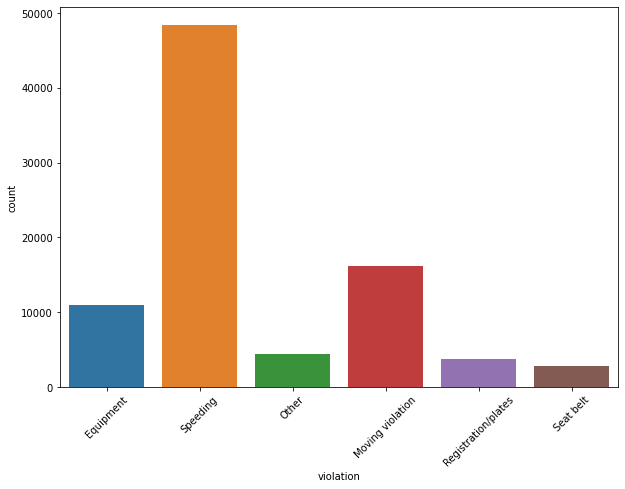

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x=ri.violation, data=ri)
plt.xticks(rotation=45)

In [18]:
# Looking at this instead by proportions using the normalize=True parameter
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

## Create separate dataframes for each gender and analyze

In [19]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

In [20]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [21]:
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Equipment'),
  Text(1, 0, 'Speeding'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Moving violation'),
  Text(4, 0, 'Registration/plates'),
  Text(5, 0, 'Seat belt')])

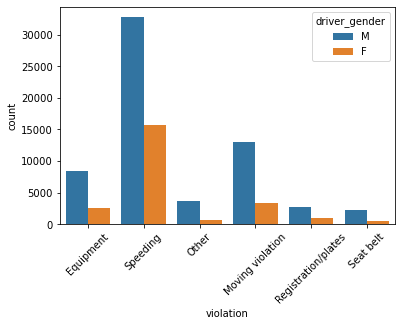

In [30]:
sns.countplot(x='violation', hue='driver_gender', data=ri)
plt.xticks(rotation=45)

## Let's further explore 'Speeding' with respect to gender

In [23]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]

In [24]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [25]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [108]:
# We can do the same as above by using a groupby to create a dataframe that can be easily plotted
perct_gender_stop_outcome = (
    ri.groupby('driver_gender')['stop_outcome']
    # use value_counts() because we can normalize - .size() doesn't have this feature
    .value_counts(normalize=True)
    # rename the series created by the groupby
   .rename('percentage')
    # change the values to be percentages between 0-100%
   .mul(100)
    # change groupby series object into a dataframe
   .reset_index()
   # sort the percentage column in descending order
   .sort_values('percentage', ascending=False))

In [109]:
perct_gender_stop_outcome.head()

,driver_gender,stop_outcome,percentage
0,F,Citation,89.387566
6,M,Citation,88.971033
1,F,Warning,6.246320
7,M,Warning,5.817214
8,M,Arrest Driver,3.471846


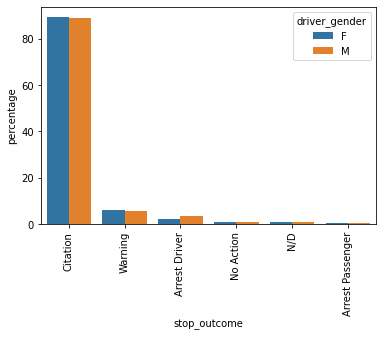

In [110]:
p = sns.barplot(x="stop_outcome", y="percentage", hue="driver_gender", data=perct_gender_stop_outcome)
_ = plt.setp(p.get_xticklabels(), rotation=90)

#### Gender does not seem to make a difference in stop_outcome

# Let's explore 'searched' with respect to gender

In [130]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


The search_conducted column appears to have values of True and False so it's likely a boolean column
Let's confirm this

In [133]:
ri.search_conducted.dtype

dtype('bool')

In [134]:
# The overall rate of searches being conducted is:
ri.search_conducted.value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [135]:
# An alternative method to do the above is to take the .mean() of a bool series
ri.search_conducted.mean()

0.0382153092354627

In [136]:
# Examine the rates of being searched by each gender
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

#### Male drivers are searched at a rate of more than twice that of females!

This could be due to the rate at which Males and Females commit different violation types.

In [139]:
# Calculate the search rate for each combination of gender and violation
gender_violation = ri.groupby(['driver_gender','violation'])['search_conducted']\
.mean()\
.rename('perct')\
.reset_index()\
.sort_values('perct', ascending=False)

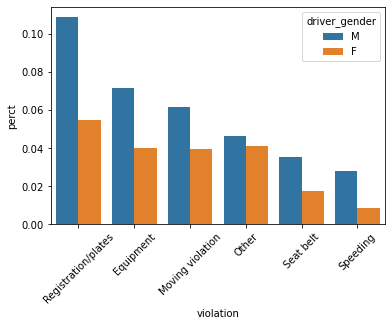

In [141]:
p = sns.barplot(x='violation', y='perct', hue='driver_gender', data=gender_violation)
_ = plt.setp(p.get_xticklabels(), rotation=45)

#### It appears that regardless of the violation committed that Males have a higher search rate than Females

## What happens during a search?

In [144]:
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [146]:
# Examine what the possible outcomes are for a conducted search
# include dropna=False to confirm we get the same number as given by "False" for search_conducted
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

There are five 'base' categories and then combinations of these base categories
For example: 'Incident to Arrest,Inventory' is a combination where two base types occured
In order to determine ALL occurences where for example "Inventory" occured we need to examine any result that contains that string

In [153]:
# Create column to return True is string is found and False if not found OR it has a missing value
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

In [154]:
# Calculate the number of searches that included an Inventory
ri['inventory'].sum()

441

In [159]:
# To get the percentage of searches that had an Inventory we need to look at the .mean() of only those rows where a search was conducted
ri[ri.search_conducted == True]['inventory'].mean() * 100

13.335349259147264

In [160]:
# Look at the affect of gender on the 'Inventory' type search
ri[ri.search_conducted == True].groupby('driver_gender').inventory.mean()

driver_gender
F    0.175439
M    0.126622
Name: inventory, dtype: float64

In [161]:
# Do this for the other base categories of search
ri['IncidentToArrest'] = ri.search_type.str.contains('Incident to Arrest', na=False)

In [162]:
ri['ProbableCause'] = ri.search_type.str.contains('Probable Cause', na=False)

In [163]:
ri['ReasonableSuspicion'] = ri.search_type.str.contains('Reasonable Suspicion', na=False)

In [165]:
ri['ProtectiveFrisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [169]:
# Now create a dataframe with percentages by gender for type
incidents = ri[ri.search_conducted == True].groupby('driver_gender')[['inventory','IncidentToArrest','ProbableCause','ReasonableSuspicion','ProtectiveFrisk']].mean().reset_index()

In [170]:
incidents.head()

,driver_gender,inventory,IncidentToArrest,ProbableCause,ReasonableSuspicion,ProtectiveFrisk
0,F,0.175439,0.546053,0.326754,0.059211,0.074561
1,M,0.126622,0.484742,0.367941,0.101017,0.094353


In [173]:
incidents_melt = pd.melt(incidents, id_vars=['driver_gender'], value_vars=['inventory','IncidentToArrest','ProbableCause','ReasonableSuspicion','ProtectiveFrisk'], var_name='SearchType', value_name='percent')

In [174]:
incidents_melt.head()

,driver_gender,SearchType,percent
0,F,inventory,0.175439
1,M,inventory,0.126622
2,F,IncidentToArrest,0.546053
3,M,IncidentToArrest,0.484742
4,F,ProbableCause,0.326754


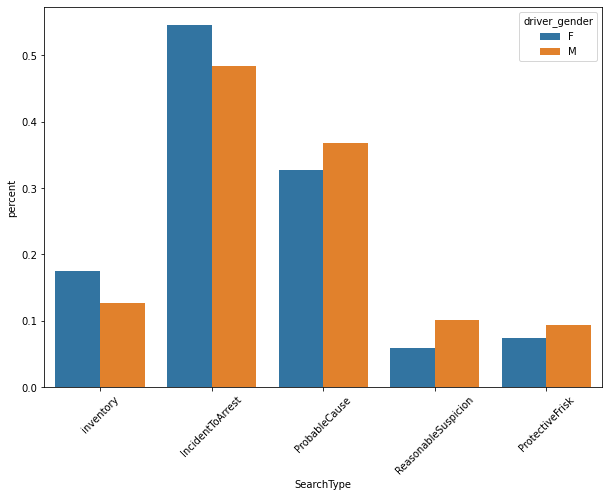

In [177]:
fig, ax = plt.subplots(figsize=(10,7))
p = sns.barplot(x='SearchType', y='percent', data=incidents_melt, hue='driver_gender')
_ = plt.setp(p.get_xticklabels(), rotation=45)

## Does time of day affect arrest rate?

In [179]:
# First calculate the overall arrest rate using the is_arrested column
ri.is_arrested.mean() * 100

3.55690117407784

In [182]:
# Calculate the hourly arrest rate using the date_and_time index of the dataframe
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

Text(0.5, 1.0, 'Arrest Rate by Time of Day')

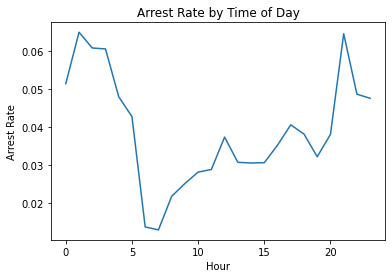

In [184]:
# Plot the hourly arrest rate by the matplotlib .plot() method
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

Text(0.5, 1.0, 'Arrest Rate by Time of Day')

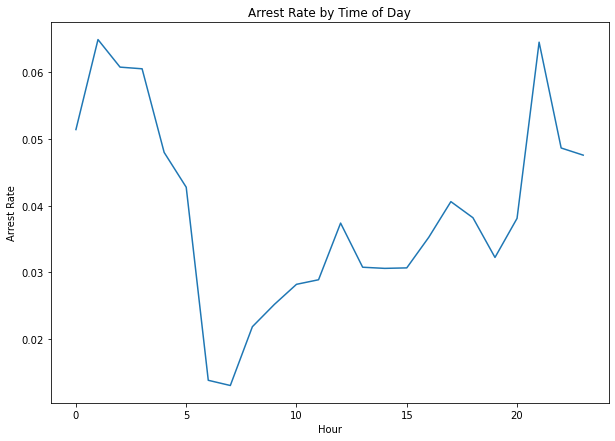

In [188]:
# Plot the hourly arrest rate using Seaborn
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data=hourly_arrest_rate)
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

The arrest rate spikes overnight!


# Are Drug-related stops becoming more common over time?
In a small portion of traffic stops, drugs are found in the vehicle during a search - the column drugs_related_stop has a boolean value we can use for this analysis

In [191]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

date_and_time
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


<AxesSubplot:xlabel='date_and_time', ylabel='drugs_related_stop'>

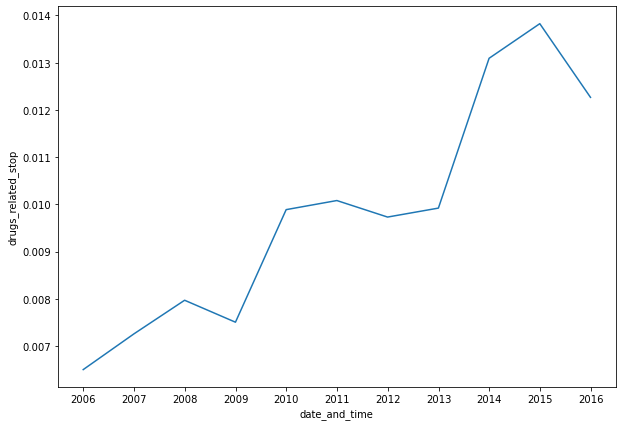

In [195]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data=annual_drug_rate)

The rate of drug-related stops has nearly doubled over the 10 year period from 2006-2016!
Is this due to a higher number of searches or more drugs involved per search?
To determine which is true let's plot the annual number of searches so we can normalize

In [196]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

In [197]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

In [201]:
annual.head()

,drugs_related_stop,search_conducted
date_and_time,,
2005-12-31,0.006501,0.049167
2006-12-31,0.007258,0.041758
2007-12-31,0.007970,0.044056
2008-12-31,0.007505,0.040310
2009-12-31,0.009889,0.049861


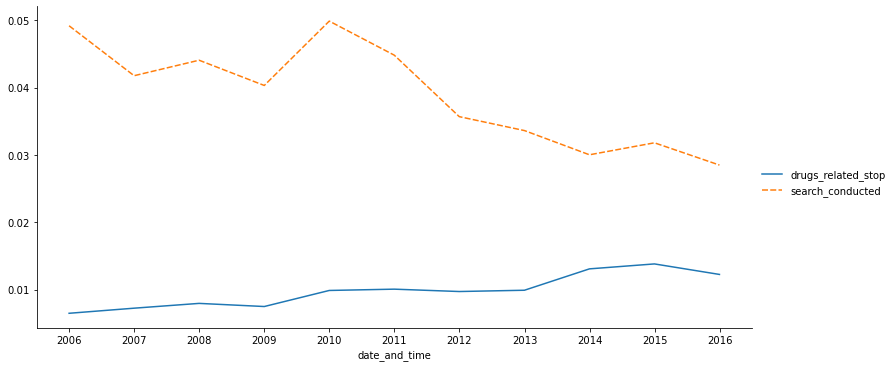

In [275]:
# Create subplots from 'annual'
#fig, ax = plt.subplots(figsize=(10,7))
sns.relplot(data=annual, kind='line', aspect=15/7)

array([<AxesSubplot:xlabel='date_and_time'>,
       <AxesSubplot:xlabel='date_and_time'>], dtype=object)

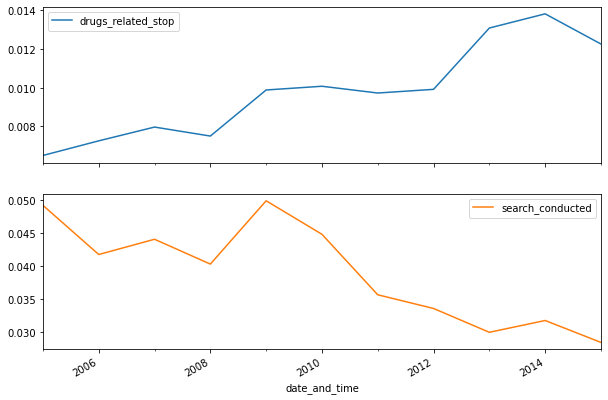

In [267]:
# Plot using the plot() method
plt.rc('figure', figsize=(10,7))
annual.plot(subplots=True)

The drug-related stops increased almost two-fold even though the number of stops decreased by almost half - disproving our hypothesis that the increase in drug-related stops was due to an increase in the number of stops

## Examine violations by police districts

In [221]:
# Create a frequency table of districts and violations 
all_zones = pd.crosstab(ri.district, ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [252]:
# Subset this freq table to include only 'K' zones
k_zones = all_zones.loc['Zone K1':'Zone K3']

<AxesSubplot:xlabel='district'>

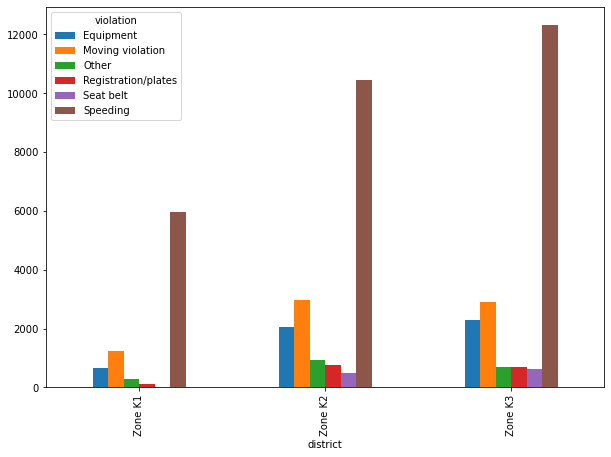

In [280]:
#Plot the k_zones to visualize the data
plt.rc('figure', figsize=(10,7))
k_zones.plot(kind='bar')

In [281]:
stacked = k_zones.stack().reset_index().rename(columns={0:'value'})

<AxesSubplot:xlabel='district', ylabel='value'>

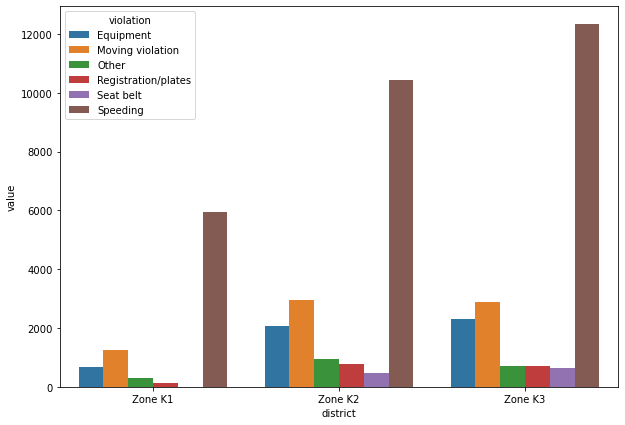

In [286]:
sns.barplot(x=stacked.district, y=stacked.value, hue=stacked.violation)

<AxesSubplot:xlabel='district'>

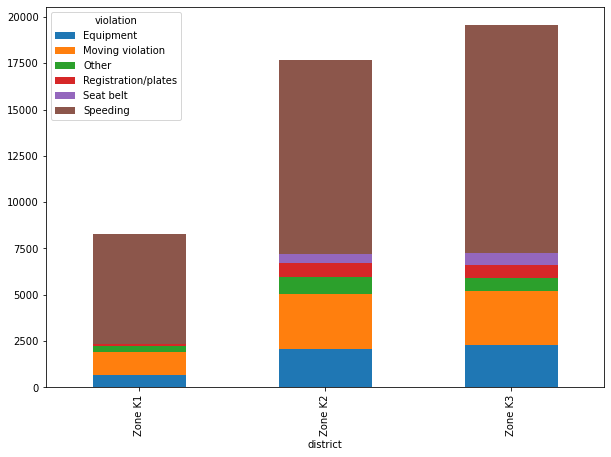

In [287]:
# Create a stacked bar plot
k_zones.plot.bar(stacked=True)

# Examine the stop durations

In [290]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

We need to convert the string values into something we can plot and analyze

In [291]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [293]:
ri.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

### How long can we expect to be stopped for depending on the violation?

In [296]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

Text(0.5, 1.0, 'Average Minutes stopped by type of Violation')

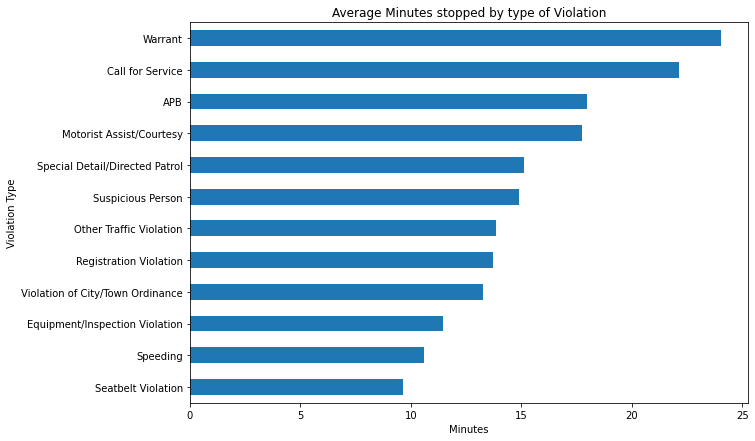

In [299]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')
plt.xlabel('Minutes')
plt.ylabel('Violation Type')
plt.title('Average Minutes stopped by type of Violation')

# Does Weather have an impact on policing?

Since the policing data doesn't have location data we are unable to localize weather to a specific stop. However, since Rhode Island is the smallest state, we can get a rough idea of the weather by using the values from a single station for every policing stop.
![NOAA RI Weather](images/NOAA_RI_Weather.png)

In [300]:
# Read in the NOAA Rhode Island Weather csv file
weather = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv')

In [301]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [302]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

## Examine the windspeed data for trustworthiness

In [303]:
# AWND is the average windspeed during any 2 min period and WSF2 is the fastest wind speed during any 2 minute period
# A sanity check should not have any 'unreasonable' values and the avg should always be less than the max
weather[['AWND','WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


The head shows 'reasonable' data as per the above evaluation criteria

In [304]:
# Examine the statistics of these two colums
weather[['AWND','WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


The AWND values are all less than the max WSF2 values and the numbers are what we would reasonably expect given that speeds are in mph for wind so the data seems trustworthy from this spot check

<AxesSubplot:>

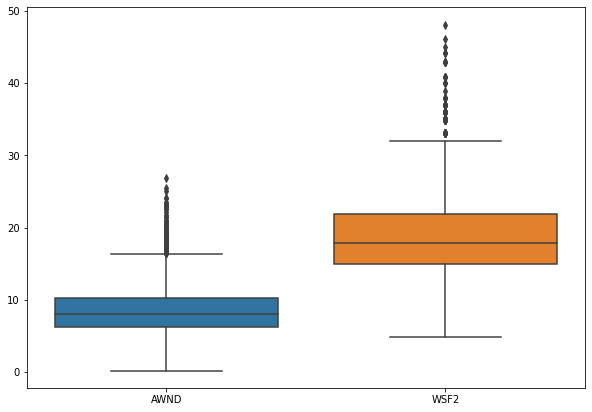

In [307]:
# Using a box plot will help us visualize the distribution of these two columns
sns.boxplot(data=weather[['AWND','WSF2']])

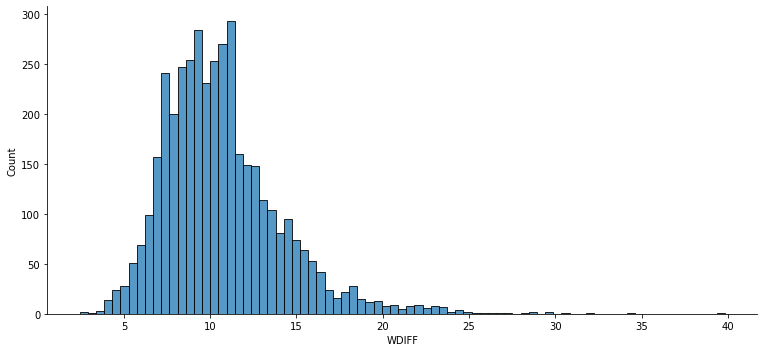

In [310]:
# Plot the difference between the avg and max windspeed columns
weather['WDIFF'] = weather.WSF2 - weather.AWND
sns.displot(data=weather.WDIFF, aspect=15/7)

There are no values below zero and the distribution looks "Normal" or Gaussian. Given that many natural phenomenon are Gaussian this further gives confidence we can trust this data.

## Examine the temperature data for trustworthiness

In [311]:
# Create list of temp columns
tempcols = ['TMIN','TAVG','TMAX']

In [316]:
weather[tempcols].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


<AxesSubplot:>

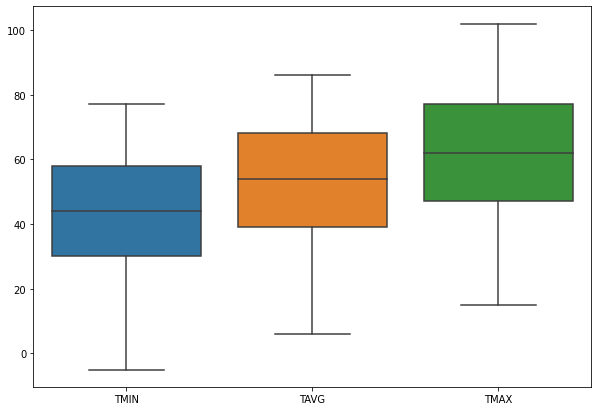

In [315]:
#Plot out a box plot of the temperature columns
sns.boxplot(data=weather[tempcols])

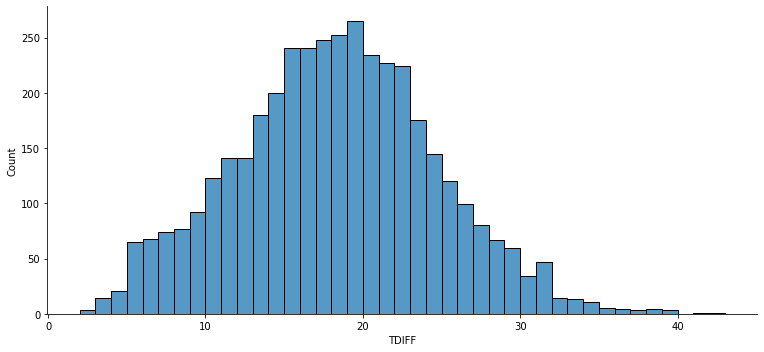

In [318]:
# Plot the difference between the avg and max windspeed columns
weather['TDIFF'] = weather.TMAX - weather.TMIN
sns.displot(data=weather.TDIFF, aspect=15/7)

In [319]:
# Review the summary statistics for the TDIFF
weather.TDIFF.describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

The summary statistics of TDIFF show no negative values, the box plot indicates TAVG is between the TMAX and TMIN and distribution looks normal. The data looks to be trustworthy.

In [320]:
weather.shape

(4017, 29)

In [321]:
## Subset the weather data to just consider the temperature columns
temp = weather.loc[:,tempcols]

In [322]:
temp.head()

,TMIN,TAVG,TMAX
0,35,44.0,53
1,28,36.0,44
2,44,49.0,53
3,39,42.0,45
4,28,36.0,43


In [324]:
temp.sum(axis=1).head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

## Examine Bad weather conditions 

We will isolate the columns that indicate bad weather.

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

We will quantify "how bad" the weather was on a given day by counting the number of '1' values

In [338]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

<AxesSubplot:>

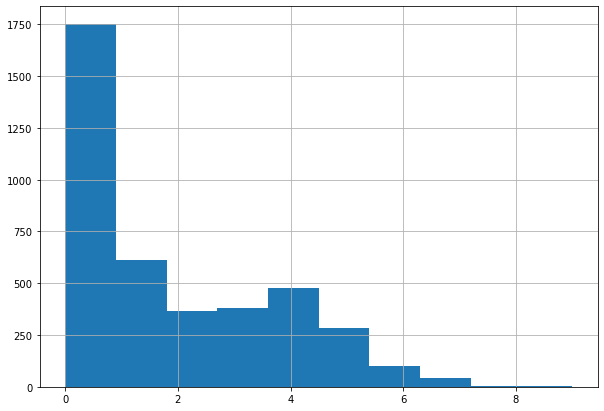

In [344]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.hist()

Looks like most days had zero bad weather conditions.

Use the counts to create a rating system for the weather.

The counts range from 0 to 9, and will be converted to ratings as follows:

* Convert 0 to 'good'
* Convert 1 through 4 to 'bad'
* Convert 5 through 9 to 'worse'

In [347]:
# Count the unique values in the bad_conditions column so we can do the mapping
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [348]:
# Create a dictionary that maps integers to strings
mapping = {0:'good',
           1:'bad',
           2:'bad',
           3:'bad',
           4:'bad',
           5:'worse',
           6:'worse',
           7:'worse',
           8:'worse',
           9:'worse'}

In [349]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

In [351]:
# Count the unique values in 'rating'
weather.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [353]:
# Change the rating to a 'category' dtype and use an order list
cats = ['good','bad','worse']
weather['rating'] = weather['rating'].astype(CategoricalDtype(categories=cats))
weather.rating.dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=False)

In [372]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,...,district,inventory,IncidentToArrest,ProbableCause,ReasonableSuspicion,Protective Frisk,ProtectiveFrisk,stop_minutes,stop_length,stopLength
date_and_time,,,,,,,,,,,,,,,,,,,,,
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,...,Zone K3,False,False,False,False,False,False,8,short,short
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,...,Zone X4,False,False,False,False,False,False,8,short,short
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,...,Zone X1,False,False,False,False,False,False,23,medium,medium
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,...,Zone X3,False,False,False,False,False,False,8,short,short
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,...,Zone K3,False,False,False,False,False,False,8,short,short


# Merge the weather data with the ri data

In [373]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
ri.head()

,date_and_time,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,...,district,inventory,IncidentToArrest,ProbableCause,ReasonableSuspicion,Protective Frisk,ProtectiveFrisk,stop_minutes,stop_length,stopLength
0,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,...,Zone K3,False,False,False,False,False,False,8,short,short
1,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,...,Zone X4,False,False,False,False,False,False,8,short,short
2,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,...,Zone X1,False,False,False,False,False,False,23,medium,medium
3,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,...,Zone X3,False,False,False,False,False,False,8,short,short
4,2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,...,Zone K3,False,False,False,False,False,False,8,short,short


In [374]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


In [375]:
# Examine the shape of 'ri'
print(ri.shape)

(86535, 23)


In [376]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = ri.merge(weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
ri_weather.shape

(86535, 25)

In [393]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('date_and_time', inplace=True)

In [394]:
ri_weather.head()

,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,...,IncidentToArrest,ProbableCause,ReasonableSuspicion,Protective Frisk,ProtectiveFrisk,stop_minutes,stop_length,stopLength,DATE,rating
date_and_time,,,,,,,,,,,,,,,,,,,,,
2005-01-23 23:15:00,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,...,False,False,False,False,False,8,short,short,2005-01-23,worse
2005-02-17 04:15:00,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,...,False,False,False,False,False,8,short,short,2005-02-17,good
2005-02-20 17:15:00,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,...,False,False,False,False,False,23,medium,medium,2005-02-20,bad
2005-02-24 01:20:00,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,...,False,False,False,False,False,8,short,short,2005-02-24,bad
2005-03-14 10:00:00,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,...,False,False,False,False,False,8,short,short,2005-03-14,good


In [395]:
ri_weather.columns

Index(['stop_time', 'driver_gender', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop', 'district',
       'inventory', 'IncidentToArrest', 'ProbableCause', 'ReasonableSuspicion',
       'Protective Frisk', 'ProtectiveFrisk', 'stop_minutes', 'stop_length',
       'stopLength', 'DATE', 'rating'],
      dtype='object')

In [396]:
ri_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86535 entries, 2005-01-23 23:15:00 to 2015-12-31 22:47:00
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   stop_time            86535 non-null  object  
 1   driver_gender        86535 non-null  object  
 2   driver_race          86535 non-null  object  
 3   violation_raw        86535 non-null  object  
 4   violation            86535 non-null  object  
 5   search_conducted     86535 non-null  bool    
 6   search_type          3307 non-null   object  
 7   stop_outcome         86535 non-null  object  
 8   is_arrested          86535 non-null  bool    
 9   stop_duration        86535 non-null  object  
 10  drugs_related_stop   86535 non-null  bool    
 11  district             86535 non-null  object  
 12  inventory            86535 non-null  bool    
 13  IncidentToArrest     86535 non-null  bool    
 14  ProbableCause        86535 non-null

## Do police officers arrest more often when the weather is bad?

In [419]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.035569422776911074


In [421]:
# Calculate the arrest rate for each 'rating'
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036262
worse    0.041667
Name: is_arrested, dtype: float64

The overall arrest rate DOES appear to increase as the weather gets worse

In [424]:
# Calculate the arrest rate for each 'violation' and 'rating'
arrest_rate = ri_weather.groupby(['violation','rating']).is_arrested.mean()
arrest_rate

violation            rating
Equipment            good      0.059007
                     bad       0.066325
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

In [425]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation','bad'])

0.05804964058049641


In [426]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [427]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066325  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


In [429]:
# Create the same DataFrame using a pivot table
violation_rating = ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')
violation_rating

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066325,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


In [433]:
vr_melt = violation_rating.melt()

<AxesSubplot:>

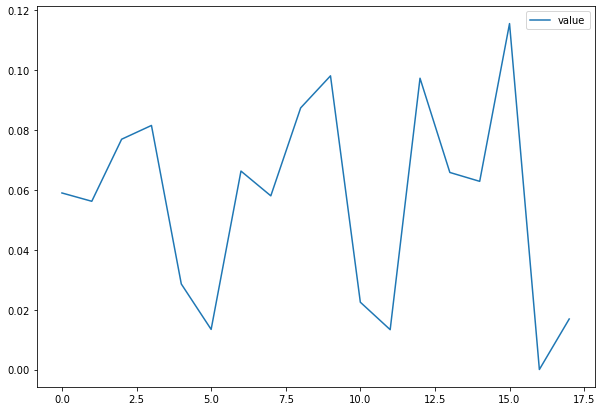

In [434]:
vr_melt.plot()

In [412]:
arrest_rate_weather = ri_weather.groupby(['violation','rating'])['is_arrested'].resample('A').mean()

In [413]:
arrest_rate_weather

violation  rating  date_and_time
Equipment  good    2005-12-31       0.120000
                   2006-12-31       0.103286
                   2007-12-31       0.065789
                   2008-12-31       0.053659
                   2009-12-31       0.083665
                                      ...   
Speeding   worse   2009-12-31       0.023447
                   2010-12-31       0.009873
                   2011-12-31       0.023810
                   2012-12-31       0.052632
                   2013-12-31       0.000000
Name: is_arrested, Length: 164, dtype: float64

In [415]:
arrest_rate_weather.unstack()

date_and_time               2005-12-31  2006-12-31  2007-12-31  2008-12-31  \
violation           rating                                                   
Equipment           good      0.120000    0.103286    0.065789    0.053659   
                    bad       0.186047    0.145963    0.063910    0.067961   
                    worse     0.181818    0.122807    0.157303    0.098361   
Moving violation    good      0.146341    0.089069    0.087379    0.051471   
                    bad       0.167665    0.119013    0.070281    0.053812   
                    worse     0.190476    0.076271    0.091603    0.059946   
Other               good      0.260870    0.258065    0.103448    0.020000   
                    bad       0.400000    0.231481    0.145161    0.058824   
                    worse     0.300000    0.166667    0.142857    0.052023   
Registration/plates good      0.238095    0.159292    0.115044    0.103448   
                    bad       0.179487    0.172840    0.141667    0.123596   
                    worse     0.333333    0.228571    0.125000    0.105263   
Seat belt           good           NaN         NaN         NaN         NaN   
                    bad            NaN         NaN         NaN         NaN   
                    worse          NaN         NaN         NaN         NaN   
Speeding            good      0.016000    0.022207    0.016224    0.011678   
                    bad       0.020408    0.018786    0.015536    0.013910   
                    worse     0.063380    0.013468    0.010804    0.015548   

date_and_time               2009-12-31  2010-12-31  2011-12-31  2012-12-31  \
violation           rating                                                   
Equipment           good      0.083665    0.080780    0.081206    0.061146   
                    bad       0.094463    0.105263    0.058268    0.046191   
                    worse     0.128378    0.061321    0.037037    0.000000   
Moving violation    good      0.036190    0.055306    0.034667    0.048163   
                    bad       0.043011    0.052336    0.041549    0.048565   
                    worse     0.066313    0.046961    0.066667    0.000000   
Other               good      0.034884    0.070175    0.056604    0.055276   
                    bad       0.053459    0.068293    0.077399    0.055016   
                    worse     0.050691    0.050955    0.043478    0.000000   
Registration/plates good      0.163934    0.098266    0.065421    0.067568   
                    bad       0.125000    0.115702    0.125000    0.046809   
                    worse     0.120482    0.051724    0.000000    0.000000   
Seat belt           good           NaN         NaN         NaN    0.000000   
                    bad            NaN         NaN         NaN    0.000000   
                    worse          NaN         NaN         NaN         NaN   
Speeding            good      0.014420    0.013920    0.018686    0.010882   
                    bad       0.009950    0.013158    0.015130    0.010290   
                    worse     0.023447    0.009873    0.023810    0.052632   

date_and_time               2013-12-31  2014-12-31  2015-12-31  
violation           rating                                      
Equipment           good      0.059649    0.037438    0.036339  
                    bad       0.049180    0.058935    0.047692  
                    worse     0.071429         NaN         NaN  
Moving violation    good      0.049008    0.060000    0.058968  
                    bad       0.053435    0.048682    0.038851  
                    worse     0.000000         NaN         NaN  
Other               good      0.093458    0.142857    0.115789  
                    bad       0.135802    0.084507    0.069767  
                    worse     0.000000         NaN         NaN  
Registration/plates good      0.045045    0.056738    0.037791  
                    bad       0.061538    0.060345    0.046512  
                    worse     0.0

<AxesSubplot:xlabel='violation,rating,date_and_time'>

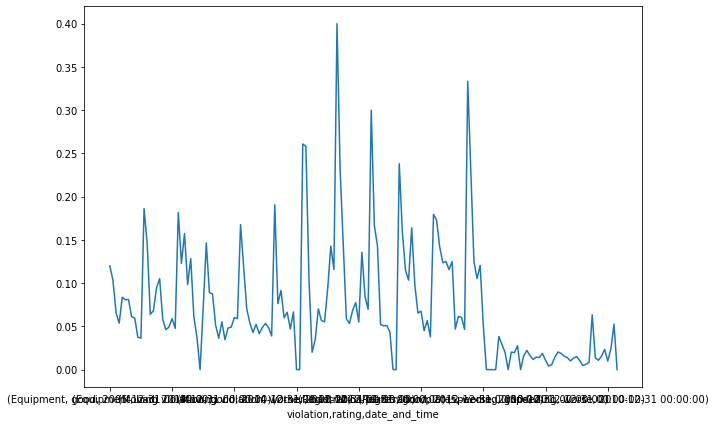

In [416]:
arrest_rate_weather.plot()

In [418]:
sns.displot(data=arrest_rate_weather,x='date_and_time' y='is_arrested', hue='rating')

SyntaxError: invalid syntax (<ipython-input-418-bc703b2978ad>, line 1)

## Create stop_length category field

In [326]:
# Examine the values of the stop_duration column
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [328]:
# Create a dictionary to be used for mapping the values to new category names
mapping = {'0-15 Min':'short','16-30 Min':'medium','30+ Min':'long'}

#Create new column using .map()
ri['stop_length'] = ri.stop_duration.map(mapping)

# Review dtype of new column and memory usage
print(ri.stop_length.dtype)
ri.stop_length.memory_usage(deep=True)

object


6068041

In [336]:
# Change the stop_length to a 'category' dtype and use an order list
cats = ['short','medium','long']
ri['stop_length'] = ri['stop_length'].astype(CategoricalDtype(categories=cats))
ri.stop_length.dtype

CategoricalDtype(categories=['short', 'medium', 'long'], ordered=False)

In [337]:
ri.stop_length.memory_usage(deep=True)

779090

In [115]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [116]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.024349083895853423

In [117]:
ri.groupby('district')['is_arrested'].mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [121]:
gender_zone = ri.groupby(['driver_gender','district']).is_arrested.mean()\
.rename('perct')\
.mul(100)\
.reset_index()\
.sort_values('perct', ascending=False)

In [122]:
gender_zone.head()

,driver_gender,district,perct
11,M,Zone X4,4.995582
5,F,Zone X4,4.214906
10,M,Zone X3,3.816592
8,M,Zone K3,3.496112
7,M,Zone K2,3.428526


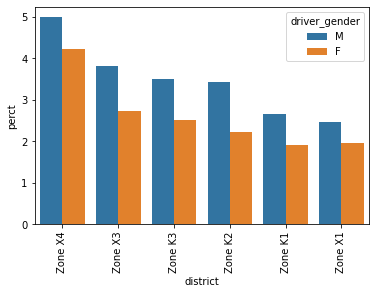

In [142]:
p = sns.barplot(x='district', y='perct', hue='driver_gender',data=gender_zone)
k = plt.setp(p.get_xticklabels(), rotation=90)